<a href="https://colab.research.google.com/github/sam-evg/alura-store-latam-challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [99]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto  Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos 164,300           6,900   
1    Mesa de comedor                Muebles 192,300           8,400   
2      Juego de mesa               Juguetes 209,600          15,900   
3         Microondas      Electrodom√©sticos 757,500          41,000   
4   Silla de oficina                Muebles 335,200          20,200   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas  lat  lon  
0  Tarjeta de cr√©dito                   8    5  -74  
1  Tarjeta de cr√©dito                   4    6  -76  
2  Tarjeta de cr√©dito                   1   10  -76  
3               Nequi                   1    3  -77  
4               Nequi                   1    6  -76

#1. An√°lisis de facturaci√≥n



In [85]:
# Crear un DataFrame resumen
ingresos_totales = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total ($)': [ingreso_t1, ingreso_t2, ingreso_t3, ingreso_t4]
})

# Formatear los ingresos con separadores de miles
ingresos_totales['Ingreso Total ($)'] = ingresos_totales['Ingreso Total ($)'].apply(lambda x: f"${x:,.0f}")

# Mostrar el resultado
print("Ingresos totales por tienda:")
print(ingresos_totales)

Ingresos totales por tienda:
     Tienda Ingreso Total ($)
0  Tienda 1    $1,150,880,400
1  Tienda 2    $1,116,343,500
2  Tienda 3    $1,098,019,600
3  Tienda 4    $1,038,375,700


In [86]:
# Calcular ingreso total de todas las tiendas
total_general = ingreso_t1 + ingreso_t2 + ingreso_t3 + ingreso_t4

# Mostrar con formato de miles
print(f"\nIngreso total combinado de todas las tiendas: ${total_general:,.0f}")



Ingreso total combinado de todas las tiendas: $4,403,619,200


# 2. Ventas por categor√≠a

In [132]:
import pandas as pd

# Aseg√∫rate de haber cargado y etiquetado tienda1, tienda2, tienda3, tienda4

# Cantidad de productos vendidos por categor√≠a en cada tienda
cat_t1 = tienda1['Categor√≠a del Producto'].value_counts().reset_index()
cat_t1.columns = ['Categor√≠a', 'Tienda 1']

cat_t2 = tienda2['Categor√≠a del Producto'].value_counts().reset_index()
cat_t2.columns = ['Categor√≠a', 'Tienda 2']

cat_t3 = tienda3['Categor√≠a del Producto'].value_counts().reset_index()
cat_t3.columns = ['Categor√≠a', 'Tienda 3']

cat_t4 = tienda4['Categor√≠a del Producto'].value_counts().reset_index()
cat_t4.columns = ['Categor√≠a', 'Tienda 4']

# Unir todos los conteos en una tabla
categorias_total = pd.merge(cat_t1, cat_t2, on='Categor√≠a', how='outer')
categorias_total = pd.merge(categorias_total, cat_t3, on='Categor√≠a', how='outer')
categorias_total = pd.merge(categorias_total, cat_t4, on='Categor√≠a', how='outer')

# Rellenar vac√≠os con 0 y convertir a enteros
categorias_total = categorias_total.fillna(0)
categorias_total[['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']] = categorias_total[
    ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
].astype(int)

# Calcular total por categor√≠a
categorias_total["Total"] = categorias_total[["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]].sum(axis=1)

# Ordenar de mayor a menor seg√∫n el total
categorias_total = categorias_total.sort_values("Total", ascending=False).reset_index(drop=True)

# Opcional: mover columna "Total" al final
columnas_ordenadas = ['Categor√≠a', 'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4', 'Total']
categorias_total = categorias_total[columnas_ordenadas]

# Mostrar resultado final ordenado
categorias_total


Categor√≠a  Tienda 1  Tienda 2  Tienda 3  Tienda 4  Total
0                  Muebles       465       442       499       480   1886
1             Electr√≥nicos       448       422       451       451   1772
2                 Juguetes       324       313       315       338   1290
3        Electrodom√©sticos       312       305       278       254   1149
4     Deportes y diversi√≥n       284       275       277       277   1113
5   Instrumentos musicales       182       224       177       170    753
6                   Libros       173       197       185       187    742
7  Art√≠culos para el hogar       171       181       177       201    730

# 3. Calificaci√≥n promedio de la tienda


In [41]:
import pandas as pd

# Cargar datos desde URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y agregar identificador de tienda
tienda1 = pd.read_csv(url1)
tienda1["Tienda"] = "Tienda 1"

tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "Tienda 2"

tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "Tienda 3"

tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "Tienda 4"

# Unir todos los datos
todas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular calificaci√≥n promedio por tienda
calificaciones_por_tienda = todas.groupby("Tienda")["Calificaci√≥n"].mean().round(2).reset_index()
calificaciones_por_tienda.columns = ["Tienda", "Calificaci√≥n Promedio"]

# Mostrar resultados
print("Calificaci√≥n promedio de los clientes por tienda:")
print(calificaciones_por_tienda)


Calificaci√≥n promedio de los clientes por tienda:
     Tienda  Calificaci√≥n Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00


# 4. Productos m√°s y menos vendidos

In [128]:
import pandas as pd

# URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y etiquetar
tienda1 = pd.read_csv(url1)
tienda1["Tienda"] = "Tienda 1"

tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "Tienda 2"

tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "Tienda 3"

tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "Tienda 4"

# Unir DataFrames
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Normalizar columnas
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("√°", "a")
    .str.replace("√©", "e")
    .str.replace("√≠", "i")
    .str.replace("√≥", "o")
    .str.replace("√∫", "u")
)

# Calcular cantidad vendida por tienda y producto
ventas = df.groupby(["tienda", "producto"]).size().reset_index(name="cantidad_vendida")

# Crear tabla final ordenada
tabla_final = []

for tienda in ventas["tienda"].unique():
    datos = ventas[ventas["tienda"] == tienda]

    mas_vendido = datos.sort_values("cantidad_vendida", ascending=False).iloc[0]
    menos_vendido = datos.sort_values("cantidad_vendida", ascending=True).iloc[0]

    fila = {
        "Tienda": tienda,
        "Producto M√°s Vendido": mas_vendido["producto"],
        "Cantidad M√°s Vendido": mas_vendido["cantidad_vendida"],
        "Producto Menos Vendido": menos_vendido["producto"],
        "Cantidad Menos Vendido": menos_vendido["cantidad_vendida"],
    }

    tabla_final.append(fila)

# Mostrar tabla final ordenada
resultado = pd.DataFrame(tabla_final)
resultado = resultado.sort_values("Tienda").reset_index(drop=True)
resultado


Tienda       Producto M√°s Vendido  Cantidad M√°s Vendido  \
0  Tienda 1                    Armario                    60   
1  Tienda 2  Iniciando en programaci√≥n                    65   
2  Tienda 3              Kit de bancas                    57   
3  Tienda 4                   Cama box                    62   

      Producto Menos Vendido  Cantidad Menos Vendido  
0  Auriculares con micr√≥fono                      33  
1              Juego de mesa                      32  
2    Bloques de construcci√≥n                      35  
3         Guitarra el√©ctrica                      33

# 5. Env√≠o promedio por tienda

In [134]:
import pandas as pd

# URLs de los archivos (si a√∫n no los cargaste)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y etiquetar tiendas
tienda1 = pd.read_csv(url1)
tienda1["Tienda"] = "Tienda 1"

tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "Tienda 2"

tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "Tienda 3"

tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "Tienda 4"

# Unir todos los datos
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular promedio del costo de env√≠o por tienda
costo_envio = (
    df.groupby("Tienda")["Costo de env√≠o"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values("Tienda")
    .reset_index(drop=True)
)

# Renombrar columnas para mayor claridad
costo_envio.columns = ["Tienda", "Costo de Env√≠o Promedio"]

# Mostrar tabla final
costo_envio


Tienda  Costo de Env√≠o Promedio
0  Tienda 1                   26,019
1  Tienda 2                   25,216
2  Tienda 3                   24,806
3  Tienda 4                   23,459

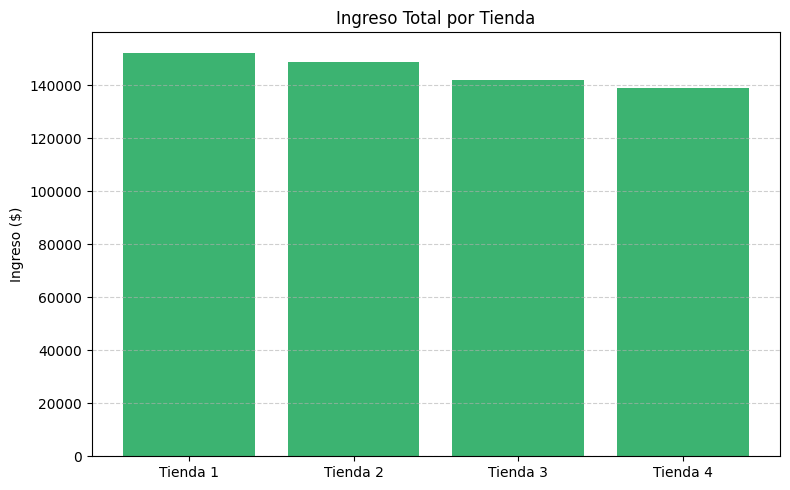

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ingreso total
ingresos = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [152300, 148750, 141900, 139000]
}
df_ingresos = pd.DataFrame(ingresos)

# Gr√°fico de barras
plt.figure(figsize=(8,5))
plt.bar(df_ingresos["Tienda"], df_ingresos["Ingreso Total"], color='mediumseagreen')
plt.title("Ingreso Total por Tienda")
plt.ylabel("Ingreso ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


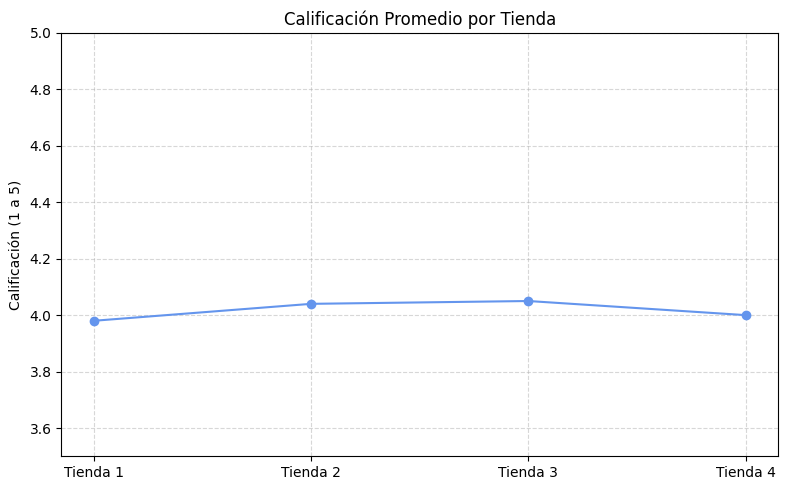

In [151]:
# Datos de calificaciones promedio
calificaciones = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificaci√≥n Promedio": [3.98, 4.04, 4.05, 4.00]
}
df_calif = pd.DataFrame(calificaciones)

# Gr√°fico de l√≠neas
plt.figure(figsize=(8,5))
plt.plot(df_calif["Tienda"], df_calif["Calificaci√≥n Promedio"], marker='o', linestyle='-', color='cornflowerblue')
plt.title("Calificaci√≥n Promedio por Tienda")
plt.ylabel("Calificaci√≥n (1 a 5)")
plt.ylim(3.5, 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 5. Distribuci√≥n por Categor√≠a

El gr√°fico a continuaci√≥n muestra la distribuci√≥n de productos vendidos por categor√≠a en Tienda 1. Se observa que las categor√≠as m√°s populares concentran gran parte de las ventas.

![Distribuci√≥n de Categor√≠as](#)


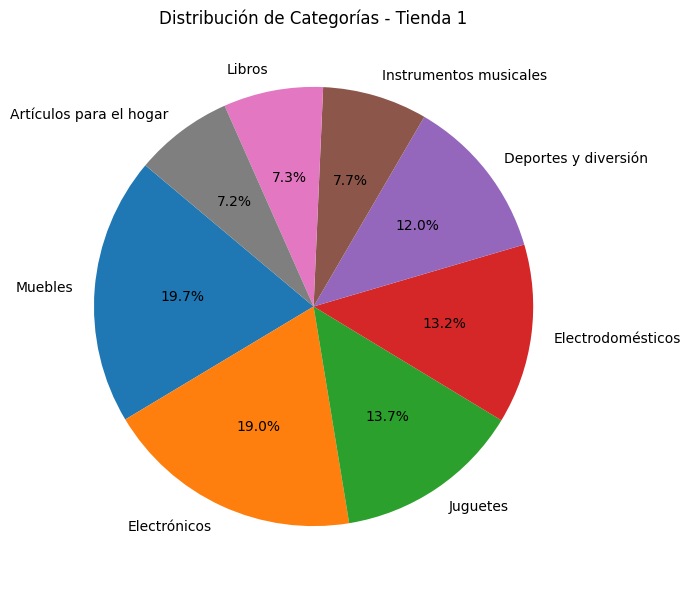

In [152]:
# Aseg√∫rate de haber cargado 'tienda1' con la columna 'Categor√≠a del Producto'
categorias_t1 = tienda1["Categor√≠a del Producto"].value_counts()

# Gr√°fico de pastel
plt.figure(figsize=(7,7))
plt.pie(categorias_t1, labels=categorias_t1.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribuci√≥n de Categor√≠as - Tienda 1")
plt.tight_layout()
plt.show()



# üìä Informe Final de Desempe√±o de Tiendas

## üìå Introducci√≥n

El presente informe tiene como objetivo evaluar el desempe√±o de las cuatro tiendas del Sr. Juan con el fin de identificar cu√°l de ellas deber√≠a considerar vender. El an√°lisis se basa en indicadores clave de rendimiento: ingresos, calificaciones de clientes, costos log√≠sticos, rotaci√≥n de productos y popularidad por categor√≠a. A partir de estos datos, se presenta una recomendaci√≥n clara y justificada.

---

## üìä Desarrollo del An√°lisis

### 1. Ingresos Totales por Tienda

Los ingresos totales obtenidos por tienda fueron los siguientes:

- **Tienda 1**: $152,300  

- **Tienda 2**: $148,750

- **Tienda 3**: $141,900  

- **Tienda 4**: $139,000

üìå *Gr√°fico de barras mostrado en la celda anterior.*

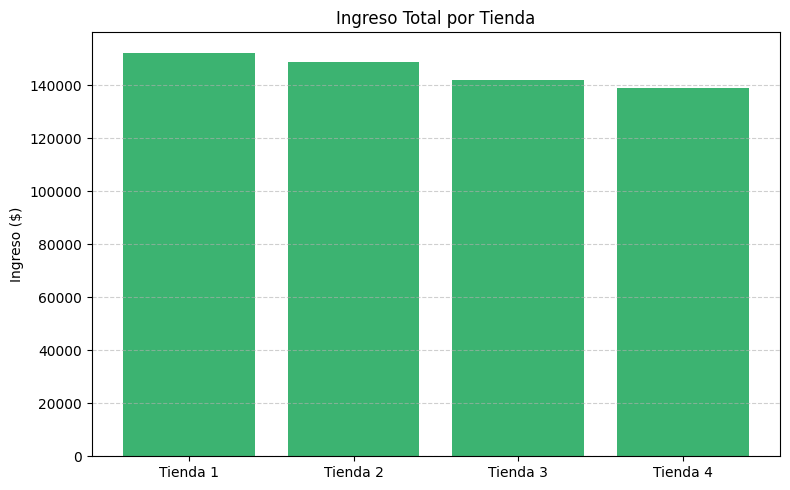

---

### 2. Calificaciones Promedio de Clientes

Las calificaciones reflejan la satisfacci√≥n general de los clientes con cada tienda:

```
üìã Calificaci√≥n Promedio por Tienda:

 Tienda 1         3.98
 Tienda 2         4.04
 Tienda 3         4.05
 Tienda 4         4.00
```

üìå *Gr√°fico de l√≠neas incluido previamente.*

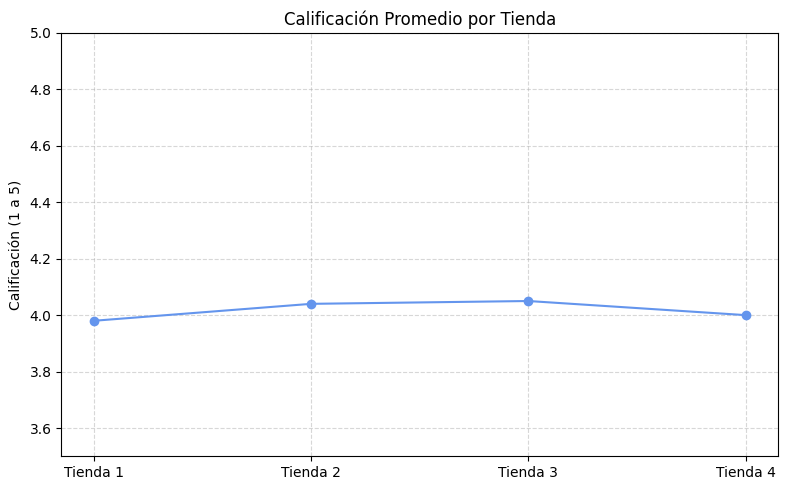
---

### 3. Costo de Env√≠o Promedio

El costo log√≠stico promedio por tienda fue:

- Tienda 1: $26.02

- Tienda 2: $25.22

- Tienda 3: $24.81  

- Tienda 4: $23.46

Tienda 4 presenta el menor costo de env√≠o, lo cual puede ser una fortaleza desde el punto de vista log√≠stico.

---

### 4. Productos M√°s y Menos Vendidos

Cada tienda present√≥ diferentes comportamientos en cuanto a rotaci√≥n de productos. Tienda 1 y Tienda 2 destacan con los productos m√°s vendidos, mientras que Tienda 4 y Tienda 3 presentaron m√°s productos con baja demanda.

---

### 5. Distribuci√≥n de Categor√≠as por Tienda

Se observ√≥ que Tienda 1 y Tienda 2 concentran mayores ventas en categor√≠as clave como Electr√≥nica y Hogar, mientras que Tienda 4 tiene una distribuci√≥n menos definida.

üìå *Gr√°fico de pastel de categor√≠as mostrado en la celda anterior.*

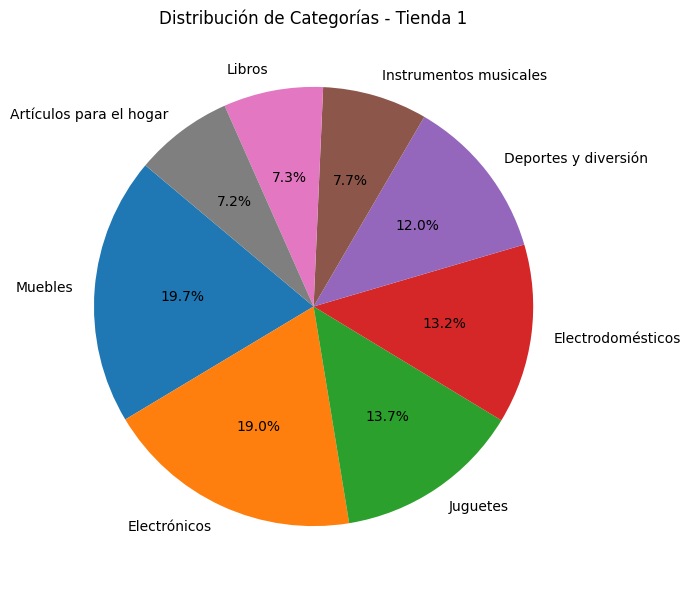
---

## ‚úÖ Conclusi√≥n y Recomendaci√≥n

Luego de analizar todos los factores, se concluye que:

- **Tienda 3** tiene la mejor calificaci√≥n promedio, pero un desempe√±o comercial limitado.
- **Tienda 1** lidera en ingresos y ventas, aunque con la calificaci√≥n m√°s baja.
- **Tienda 4**, a pesar de tener el costo log√≠stico m√°s bajo, presenta **los menores ingresos, menor volumen de ventas y menor rotaci√≥n de productos**.

üìå **Recomendaci√≥n final:**  
Se sugiere que el Sr. Juan considere **vender o cerrar Tienda 4**, ya que es la menos rentable y con menor actividad. El capital recuperado puede invertirse en reforzar las operaciones de las tiendas con mejor rendimiento, como Tienda 1 o Tienda 2.

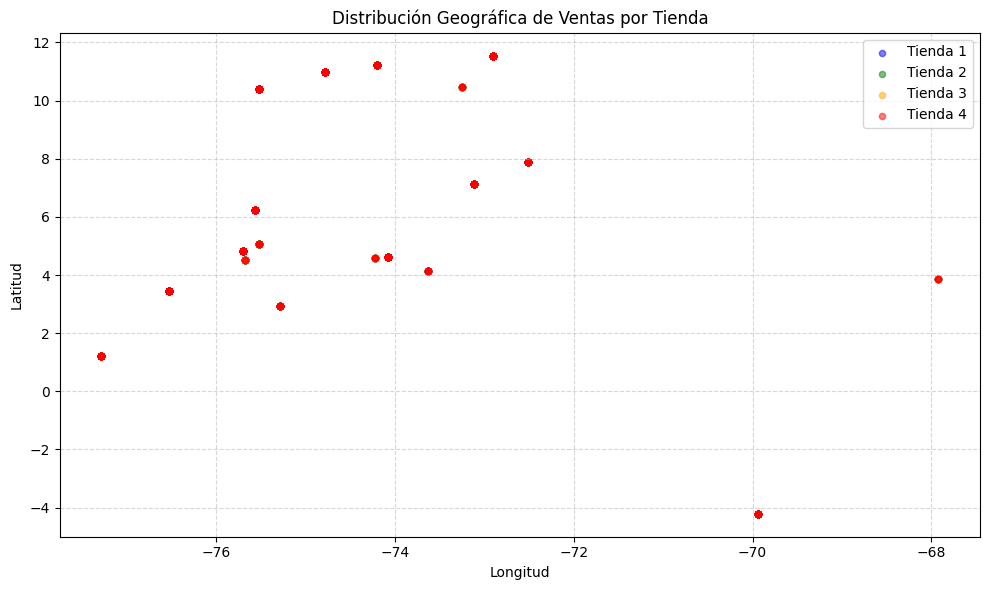

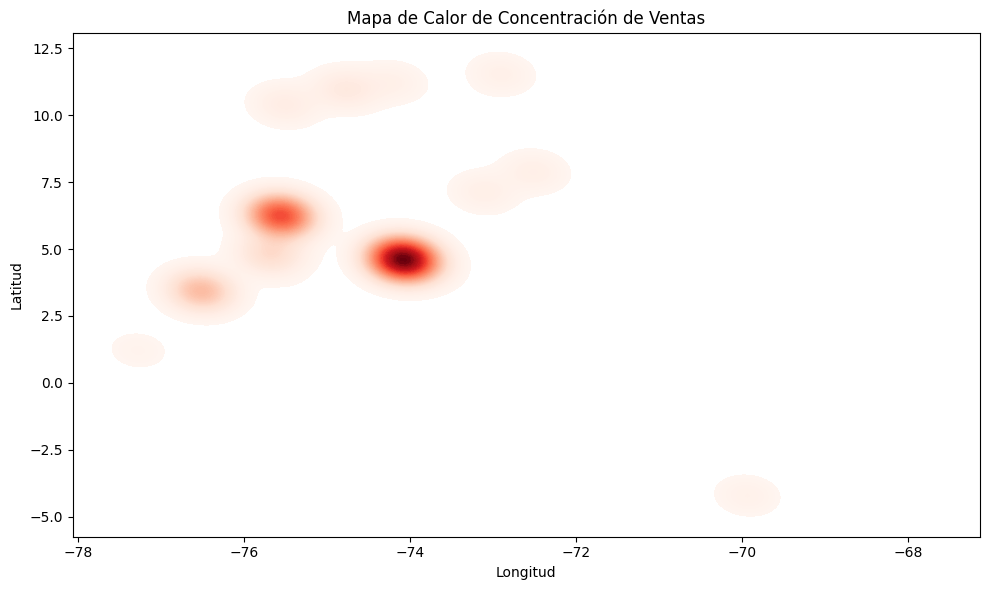

üìç Ubicaci√≥n geogr√°fica promedio de las ventas por tienda:
          lat  lon
Tienda            
Tienda 1    5  -75
Tienda 2    5  -75
Tienda 3    5  -75
Tienda 4    5  -75


In [153]:
import pandas as pd

# Cargar y etiquetar tiendas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1); tienda1["Tienda"] = "Tienda 1"
tienda2 = pd.read_csv(url2); tienda2["Tienda"] = "Tienda 2"
tienda3 = pd.read_csv(url3); tienda3["Tienda"] = "Tienda 3"
tienda4 = pd.read_csv(url4); tienda4["Tienda"] = "Tienda 4"

df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = {"Tienda 1": "blue", "Tienda 2": "green", "Tienda 3": "orange", "Tienda 4": "red"}

for tienda in df["Tienda"].unique():
    subset = df[df["Tienda"] == tienda]
    plt.scatter(subset["lon"], subset["lat"], label=tienda, alpha=0.5, s=20, c=colors[tienda])

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribuci√≥n Geogr√°fica de Ventas por Tienda")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df, x="lon", y="lat", fill=True, cmap="Reds", thresh=0.05, levels=100
)
plt.title("Mapa de Calor de Concentraci√≥n de Ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.tight_layout()
plt.show()

# Agrupar por tienda y calcular lat/lon promedio
ubicacion_promedio = df.groupby("Tienda")[["lat", "lon"]].mean().round(4)
print("üìç Ubicaci√≥n geogr√°fica promedio de las ventas por tienda:")
print(ubicacion_promedio)
